# تمرین ۳ .اعمال فیلتر در دامنه فرکانس
## بخش آ

### Import Liberaries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Read and Show Origianl Image

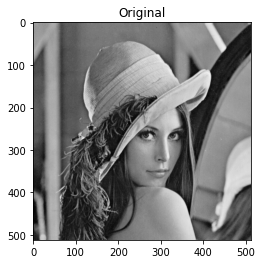

In [2]:
lena = cv2.imread('lena512.bmp', cv2.IMREAD_GRAYSCALE)
lena = lena.astype('float64')
plt.imshow(lena, cmap='gray')
plt.title('Original')
plt.show()

### Create Sobel Filters

In [3]:
horizontal_sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) / 9
vertical_sobel = horizontal_sobel.T

### Apply Sobel Filters in Spatial Domain

In [4]:
horizontal_filtered_lena = cv2.filter2D(lena, -1, -horizontal_sobel)
vertical_filtered_lena = cv2.filter2D(lena, -1, -vertical_sobel)

### Show Spatial Domain Results

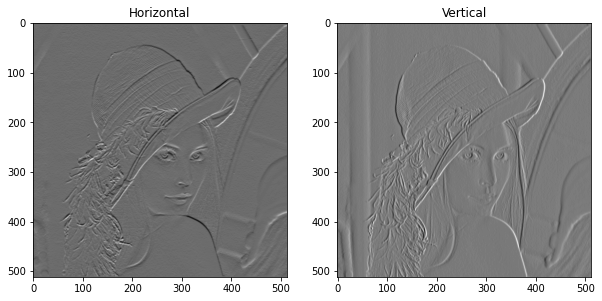

In [5]:
_, subplt = plt.subplots(1, 2, figsize=(10, 5))
subplt[0].imshow(horizontal_filtered_lena, cmap='gray')
subplt[0].title.set_text("Horizontal")
subplt[1].imshow(vertical_filtered_lena, cmap='gray')
subplt[1].title.set_text('Vertical')
plt.show()

### Create Padded Filters

In [6]:
padded_horizontal_sobel = np.zeros(lena.shape)
padded_horizontal_sobel[0:3, 0:3] = horizontal_sobel
padded_vertical_sobel = np.zeros(lena.shape)
padded_vertical_sobel[0:3, 0:3] = vertical_sobel

### Calculate fft2 of Filters and Original Image

In [7]:
lena_freq = np.fft.fft2(lena)
horizontal_sobel_freq = np.fft.fft2(padded_horizontal_sobel)
vertical_sobel_freq = np.fft.fft2(padded_vertical_sobel)

### Show Filters in Frequency Domain

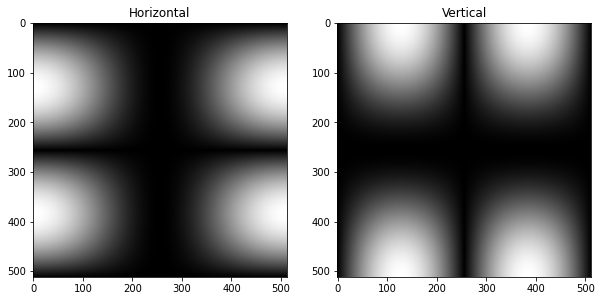

In [8]:
_, subplt = plt.subplots(1, 2, figsize=(10, 5))
subplt[0].imshow(np.absolute(horizontal_sobel_freq), cmap='gray')
subplt[0].title.set_text("Horizontal")
subplt[1].imshow(np.absolute(vertical_sobel_freq), cmap='gray')
subplt[1].title.set_text('Vertical')
plt.show()

نمایش فیلتر ها در مد فرکانس محل قرار گیری کامپوننت ها فرکانس بالای عمودی و افقی  در مد فرکانس را به ما نشان می دهد
محل های روشن مکان قرار گیری این عناصر فرکانس بالا هستند

### Apply Filters in Frequency Domain

In [9]:
horizontal_filtered_lena_freq = lena_freq * horizontal_sobel_freq
vertical_filtered_lena_freq = lena_freq * vertical_sobel_freq

### Calculate Inverse of fft for Images

In [10]:
horizontal_filtered_lena_freq = np.fft.ifft2(horizontal_filtered_lena_freq)
vertical_filtered_lena_freq = np.fft.ifft2(vertical_filtered_lena_freq)

### Show Frequency Domain Results

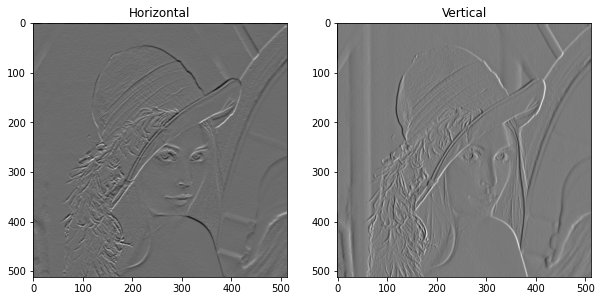

In [11]:
_, subplt = plt.subplots(1, 2, figsize=(10, 5))
subplt[0].imshow(horizontal_filtered_lena_freq.real, cmap='gray')
subplt[0].title.set_text("Horizontal")
subplt[1].imshow(vertical_filtered_lena_freq.real, cmap='gray')
subplt[1].title.set_text('Vertical')
plt.show()

### Compare Results

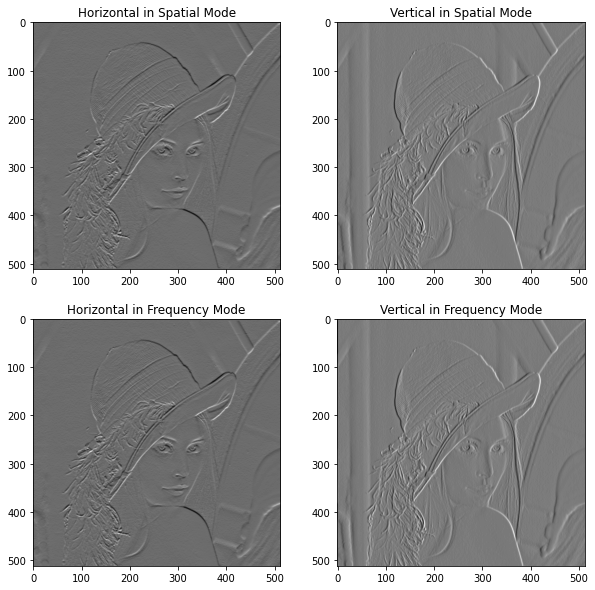

In [12]:
_, subplt = plt.subplots(2, 2, figsize=(10, 10))
subplt[0][0].imshow(horizontal_filtered_lena, cmap='gray')
subplt[0][0].title.set_text("Horizontal in Spatial Mode")
subplt[0][1].imshow(vertical_filtered_lena, cmap='gray')
subplt[0][1].title.set_text('Vertical in Spatial Mode')
subplt[1][0].imshow(horizontal_filtered_lena_freq.real, cmap='gray')
subplt[1][0].title.set_text('Horizontal in Frequency Mode')
subplt[1][1].imshow(vertical_filtered_lena_freq.real, cmap='gray')
subplt[1][1].title.set_text('Vertical in Frequency Mode')
plt.show()

مقایسه تصاویر در مد مکان با تصاویر نظیر در مد فرکانس نشان می دهد که خروجی هر دو تا حد خیلی زیادی یکسان بوده و عملا برای چشم انسان تفاوتی بین اعمال فیلتر در مد فرکانس و مد مکان دیده نمی شود 

از لحاظ محاسبات ریاضی نیز تبدیل فیلتر و ضرب آن در مد فرکانس معادل کانوالو کردن فیلتر در مد مکان است